In [ ]:
# global variables
import torch

BATCH_SIZE = 16
LEARNING_RATE = 5e-5
NUM_EPOCHS = 10
NUM_CLASSES = 1

RANDOM_SEED = 1000
USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")

In [ ]:
import kagglehub
import pandas as pd
import os

# Step 1: Download the full dataset folder
dataset_path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Dataset downloaded to:", dataset_path)

# Step 2: Build full path to metadata CSV
csv_file = os.path.join(dataset_path, "HAM10000_metadata.csv")

# Step 3: Load CSV manually with pandas
df = pd.read_csv(csv_file)

df_model = df.copy()

from sklearn.preprocessing import StandardScaler

metadata_cols = ['age', 'sex', 'localization']  # adjust if needed
df_model['age'] = df_model['age'].fillna(df_model['age'].mean())  # Fill missing age with mean
df_model['sex'] = df_model['sex'].fillna('unknown')         # Create 'unknown' category
df_model['localization'] = df_model['localization'].fillna('unknown')  # Same here

df_model = pd.get_dummies(df_model, columns=['sex', 'localization'], drop_first=False)

scaler = StandardScaler()
df_model['age'] = scaler.fit_transform(df_model[['age']])

final_metadata_cols = [col for col in df_model.columns if col.startswith('age') or col.startswith('sex_') or col.startswith('localization_')]

# Step 4: Preview
print("First 5 rows:\n", df_model.head())

# Additional: Create binary labels (1 = malignant, 0 = benign)
malignant_labels = {"mel", "bcc", "akiec"}
df_model["binary_label"] = df_model["dx"].apply(lambda x: 1 if x in malignant_labels else 0)

print("Class counts (0 = benign, 1 = malignant):")
print(df_model["binary_label"].value_counts())

Dataset downloaded to: /kaggle/input/skin-cancer-mnist-ham10000
First 5 rows:
      lesion_id      image_id   dx dx_type       age  sex_female  sex_male  \
0  HAM_0000118  ISIC_0027419  bkl   histo  1.662953       False      True   
1  HAM_0000118  ISIC_0025030  bkl   histo  1.662953       False      True   
2  HAM_0002730  ISIC_0026769  bkl   histo  1.662953       False      True   
3  HAM_0002730  ISIC_0025661  bkl   histo  1.662953       False      True   
4  HAM_0001466  ISIC_0031633  bkl   histo  1.367434       False      True   

   sex_unknown  localization_abdomen  localization_acral  ...  \
0        False                 False               False  ...   
1        False                 False               False  ...   
2        False                 False               False  ...   
3        False                 False               False  ...   
4        False                 False               False  ...   

   localization_face  localization_foot  localization_genital  \
0 

In [ ]:
print(df_model[final_metadata_cols].isna().sum())

age                             0
sex_female                      0
sex_male                        0
sex_unknown                     0
localization_abdomen            0
localization_acral              0
localization_back               0
localization_chest              0
localization_ear                0
localization_face               0
localization_foot               0
localization_genital            0
localization_hand               0
localization_lower extremity    0
localization_neck               0
localization_scalp              0
localization_trunk              0
localization_unknown            0
localization_upper extremity    0
dtype: int64


In [ ]:
import kagglehub
import pandas as pd
import os

final_test_path = kagglehub.dataset_download("jnegrini/skin-lesions-act-keratosis-and-melanoma")
print("Final test dataset downloaded to:", final_test_path)
final_test_csv = os.path.join(final_test_path, "ISIC-images/metadata.csv")
test_df=pd.read_csv(final_test_csv)
test_df_model = test_df.copy()
print("First 5 rows:\n", test_df.head())

test_df_model['age'] = test_df_model['age'].fillna(test_df_model['age'].mean())
test_df_model['sex'] = test_df_model['sex'].fillna('unknown').str.lower()
test_df_model['localization'] = test_df_model['localization'].fillna('unknown').str.lower()
malignant_labels = {"mel", "bcc", "akiec"}
test_df_model["binary_label"] = test_df_model["dx"].apply(lambda x: 1 if x in malignant_labels else 0)


test_df_model = pd.get_dummies(test_df_model, columns=['sex', 'localization'], drop_first=False)

for col in final_metadata_cols:
    if col not in test_df_model.columns:
        test_df_model[col] = 0

test_df_model['age'] = scaler.transform(test_df_model[['age']])
test_df_model = test_df_model[final_metadata_cols + ['image_id', 'binary_label']]


print("Class counts (0 = benign, 1 = malignant):")
print(test_df_model["binary_label"].value_counts())

Final test dataset downloaded to: /kaggle/input/skin-lesions-act-keratosis-and-melanoma
First 5 rows:
                   lesion_id      image_id   dx         dx_type   age     sex  \
0  5436e3acbae478396759f0d3  ISIC_0000002  mel  histopathology  60.0  female   
1  5436e3acbae478396759f0d7  ISIC_0000004  mel  histopathology  80.0    male   
2  5436e3adbae478396759f0e9  ISIC_0000013  mel  histopathology  30.0  female   
3  5436e3aebae478396759f0fb  ISIC_0000022  mel  histopathology  55.0  female   
4  5436e3aebae478396759f103  ISIC_0000026  mel  histopathology  30.0  female   

      localization  
0  upper extremity  
1  posterior torso  
2  posterior torso  
3  lower extremity  
4  lower extremity  
Class counts (0 = benign, 1 = malignant):
binary_label
1    2100
0    1001
Name: count, dtype: int64


In [ ]:
print(test_df_model[final_metadata_cols].isna().sum())

age                             0
sex_female                      0
sex_male                        0
sex_unknown                     0
localization_abdomen            0
localization_acral              0
localization_back               0
localization_chest              0
localization_ear                0
localization_face               0
localization_foot               0
localization_genital            0
localization_hand               0
localization_lower extremity    0
localization_neck               0
localization_scalp              0
localization_trunk              0
localization_unknown            0
localization_upper extremity    0
dtype: int64


In [ ]:
#datapath where

import os

for root, dirs, files in os.walk(final_test_path):
    print(f"Folder: {root}")
    print(f"Sample files: {files[:5]}")


Folder: /kaggle/input/skin-lesions-act-keratosis-and-melanoma
Sample files: []
Folder: /kaggle/input/skin-lesions-act-keratosis-and-melanoma/ISIC-images
Sample files: ['metadata.csv']
Folder: /kaggle/input/skin-lesions-act-keratosis-and-melanoma/ISIC-images/Images
Sample files: ['ISIC_0056156.jpg', 'ISIC_0059561.jpg', 'ISIC_0053716.jpg', 'ISIC_0054024.jpg', 'ISIC_0070680.jpg']


In [ ]:
final_test_image_folders = [os.path.join(final_test_path, "ISIC-images", "Images")]

In [ ]:
# def print_unique_values(test_df, cols):
#     for col in cols:
#         print(f"\nUnique values in '{col}':")
#         print(df[col].unique())

# # Call it for the relevant columns
# print_unique_values(test_df, ["dx", "sex", "localization"])
# print_unique_values(df, ["dx", "sex", "localization"])


['ISIC_0028933.jpg', 'ISIC_0028394.jpg', 'ISIC_0027799.jpg', 'ISIC_0028100.jpg', 'ISIC_0027960.jpg']


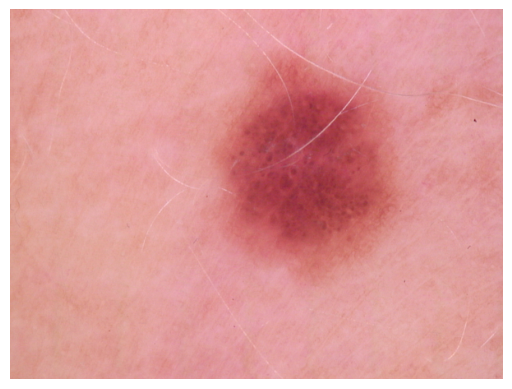

In [ ]:
image_folder = os.path.join(dataset_path, 'HAM10000_images_part_1') #only real change
image_files = os.listdir(image_folder)

# See the first 5 image filenames
print(image_files[:5])

from PIL import Image
import matplotlib.pyplot as plt

# Choose one image to display
img_path = os.path.join(image_folder, image_files[2])
img = Image.open(img_path)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np

# # Image transforms
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(20),
#     transforms.RandomVerticalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])

# Custom Dataset class
class SkinCancerDataset(Dataset):
    def __init__(self, dataframe, image_folders, transform=None, metadata_cols=None):
        self.df = dataframe
        self.image_folders = image_folders  # list of image folders
        self.transform = transform
        self.metadata_cols = metadata_cols
        self.metadata = self.df[metadata_cols].values.astype(np.float32)

        self.classes = ['benign', 'malignant']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_filename = self.df.iloc[idx]["image_id"] + ".jpg"

        # Try to find the image in one of the folders
        for folder in self.image_folders:
            img_path = os.path.join(folder, img_filename)
            if os.path.exists(img_path):
                break
        else:
            raise FileNotFoundError(f"Image {img_filename} not found in any provided folder.")

        image = Image.open(img_path).convert("RGB")

        label = self.df.iloc[idx]["binary_label"]
        label = torch.tensor(label, dtype=torch.float32)  #needed for BCEWithLogitsLoss

        if self.transform:
            image = self.transform(image)

        meta_vector = torch.tensor(self.metadata[idx], dtype=torch.float32)

        return image, meta_vector, label

# Dataset and DataLoader
image_folders = [
    os.path.join(dataset_path, 'HAM10000_images_part_1'),
    os.path.join(dataset_path, 'HAM10000_images_part_2')
]

# dataset = SkinCancerDataset(
#     df_model,
#     image_folders=image_folders,
#     transform=transform,
#     metadata_cols=final_metadata_cols
# )

# dataload = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)


In [ ]:
# SORTS THE CLASSES IN THEIR RESPECTIVE FOLDERS IN WORKING HAM10000 (Binary: Benign vs Malignant)
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import pandas as pd

df = pd.read_csv(csv_file)


# Define malignant labels
malignant_labels = {'mel', 'bcc', 'akiec'}

# Create a new column for binary class name (as folder name)
df["binary_label"] = df["dx"].apply(lambda x: 1 if x in {"mel", "bcc", "akiec"} else 0)

# Source directories (read-only)
image_src_dirs = [
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/',
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/'
]

# Target directory (writable)
output_dir = '/kaggle/working/HAM10000_binary_class/'

# Create binary class folders
for label in ['benign', 'malignant']:
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

df['binary_class'] = df['binary_label'].apply(lambda x: 'malignant' if x == 1 else 'benign')

# Move images into binary class folders
for i, row in df.iterrows():
    image_id = row['image_id']
    class_name = row['binary_class']
    image_filename = image_id + '.jpg'

    found = False
    for src_dir in image_src_dirs:
        src_path = os.path.join(src_dir, image_filename)
        if os.path.exists(src_path):
            dst_path = os.path.join(output_dir, class_name, image_filename)
            shutil.copy2(src_path, dst_path)
            found = True
            break

    if not found:
        print(f"Image not found: {image_filename}")


In [ ]:
print("Current df columns before get_dummies:\n", df_model.columns)

Current df columns before get_dummies:
 Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex_female',
       'sex_male', 'sex_unknown', 'localization_abdomen', 'localization_acral',
       'localization_back', 'localization_chest', 'localization_ear',
       'localization_face', 'localization_foot', 'localization_genital',
       'localization_hand', 'localization_lower extremity',
       'localization_neck', 'localization_scalp', 'localization_trunk',
       'localization_unknown', 'localization_upper extremity', 'binary_label'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
final_metadata_cols = [col for col in df_model.columns if col.startswith('age') or col.startswith('sex_') or col.startswith('localization_')]


In [ ]:
import numpy as np
from PIL import Image

#logic for this and the next block was derived from the following resource:
#https://stackoverflow.com/questions/44865023/how-can-i-create-a-circular-mask-for-a-numpy-array

def create_circular_mask (h, w, center = None, radius = None):

  if center is None:
    center = (int(w/2), int(h/2)) #defaulting to the center of the image when no center is given
  if radius is None:
    radius = min(center[0], center[1], w - center[0], h - center[1]) #defaulting to the greatest possible radius within the span of the image if no radius is given
  Y, X = np.ogrid[:h, :w] #creating grid of x and y coordinates for the image
  dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2) #calculating  the distsnce of eahc pixel from the center
  mask = dist_from_center <= radius #selecting all pixels beyond circle range for the mask (true inside circle, false outside)
  return mask

In [ ]:
import torch
import torchvision.transforms.functional as TF

class CircularMask:
  def __init__(self, min_scale = 0.9, max_scale = 1.0):
      self.min_scale = min_scale
      self.max_scale = max_scale
  def __call__ (self, img):
    if not isinstance (img, Image.Image):
      img = TF.to_pil_image
    w, h = img.size
    mask = create_circular_mask(h, w) #creating mask using image size

    img_array = np.array(img)
    img_array[~mask]=0 #setting all pixels within mask to black

    masked_image = Image.fromarray(img_array)
    return masked_image


#logic for this and the previous block was derived from the following resource:
#https://stackoverflow.com/questions/44865023/how-can-i-create-a-circular-mask-for-a-numpy-array


In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler
from torchvision import datasets, transforms

from torch.utils.data import Dataset
from PIL import Image

def get_data_loader(df_model, metadata_cols, batch_size=BATCH_SIZE):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.RandomVerticalFlip(),
        transforms.RandomApply([
            transforms.ColorJitter(brightness=0.3, contrast=0.3,saturation=0.3, hue=0.05)
        ], p = 0.8),
        transforms.RandomApply([
          transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
        ], p=0.3),
        CircularMask(min_scale = 0.95, max_scale =1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    # Updated root path to binary class folder
    dataset = SkinCancerDataset(
        df_model,
        image_folders=image_folders,
        transform=transform,
        metadata_cols=metadata_cols

    )
    classes = dataset.classes  # should return ['benign', 'malignant']

    split_dir = '/kaggle/working/split_indices'
    os.makedirs(split_dir, exist_ok=True)

    train_path = os.path.join(split_dir, 'train_indices.npy')
    val_path = os.path.join(split_dir, 'val_indices.npy')
    test_path = os.path.join(split_dir, 'test_indices.npy')

    if all(os.path.exists(p) for p in [train_path, val_path, test_path]):
        train_indices = np.load(train_path)
        val_indices = np.load(val_path)
        test_indices = np.load(test_path)
        print("Loaded split indices from cache.")
    else:
        print("Generating new split indices...")

        np.random.seed(RANDOM_SEED)
        indices = list(range(len(dataset)))
        np.random.shuffle(indices)

        total = len(indices)
        train = int(0.7 * total)
        val = int(0.15 * total)
        test = total - train - val

        train_indices = indices[:train]
        val_indices = indices[train:train+val]
        test_indices = indices[train+val:]

        np.save(train_path, train_indices)
        np.save(val_path, val_indices)
        np.save(test_path, test_indices)
        print("Split indices saved for future use.")

    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(train_indices),
                              num_workers=2, pin_memory=True)
    val_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(val_indices),
                            num_workers=2, pin_memory=True)
    test_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(test_indices),
                             num_workers=2, pin_memory=True)

    print("Train samples:", len(train_indices))
    print("Val samples:", len(val_indices))
    print("Test samples:", len(test_indices))

    return train_loader, val_loader, test_loader, classes


In [ ]:
#TEST TRANSFORMS

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
#FINAL TEST DATASET & DATALOADER

final_test_dataset = SkinCancerDataset(
    dataframe=test_df_model,
    image_folders=final_test_image_folders,
    transform=test_transform,
    metadata_cols=final_metadata_cols
)

final_test_loader = DataLoader(
    final_test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)



In [ ]:
def compute_pos_weight(train_loader):
    labels = []
    for _, _, targets in train_loader:
        labels.extend(targets.numpy())

    labels = np.array(labels)
    num_positives = np.sum(labels == 1)
    num_negatives = np.sum(labels == 0)

    pos_weight = num_negatives / num_positives
    return torch.tensor(pos_weight, dtype=torch.float32)


In [ ]:
train_loader, val_loader, test_loader, classes = get_data_loader(df_model, final_metadata_cols, batch_size=BATCH_SIZE)

Generating new split indices...
Split indices saved for future use.
Train samples: 7010
Val samples: 1502
Test samples: 1503


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the dataset from the train_loader
train_dataset = train_loader.dataset

indices= list(train_loader.sampler)
# Extract the labels from the dataset
labels = [int(train_dataset[i][2].item()) for i in indices]


# Get the class names
class_names = train_dataset.classes

# Count the occurrences of each class
label_counts = np.bincount(labels, minlength=len(class_names)) # ensure all classes are included even if count is 0

# Create a dictionary mapping class names to counts
class_distribution = dict(zip(class_names, label_counts))

# print("Distribution of classes in the training set:")
# print(class_distribution)

# # Plot the distribution using matplotlib.pyplot.bar
# plt.figure(figsize=(10, 6))
# bars = plt.bar(class_distribution.keys(), class_distribution.values())
# plt.title('Distribution of Skin Lesion Diagnoses in Training Set')
# plt.xlabel('Diagnosis')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# # Add count labels on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# plt.show()


In [ ]:
print(f"Metadata input dimension: {len(final_metadata_cols)}")

Metadata input dimension: 19


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class SkinLesionNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES, metadata_input_dim=19):
        super(SkinLesionNet, self).__init__()

        # Load ResNet50
        base_model = models.resnet50(pretrained=True)

        # Freeze early layers per report
        for name, param in base_model.named_parameters():
            if name.startswith('conv1') or name.startswith('bn1') or name.startswith('layer1'):
                param.requires_grad = False

        in_features = base_model.fc.in_features
        base_model.fc = nn.Identity()
        self.resnet = base_model

        #Load MLP

        self.mlp = nn.Sequential(
            nn.Linear(metadata_input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 16),
            nn.ReLU()
        )

        ##Final Classifiier

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features + 16, 1),
        )

    def forward(self, image, metadata):
        image_features = self.resnet(image)
        metadata_features = self.mlp(metadata)
        combined = torch.cat((image_features, metadata_features), dim=1)
        output = self.classifier(combined)
        return output.squeeze(1)

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np
# import torch

# def get_class_weights(train_dataset, class_names):
#     labels = [train_dataset[i][1] for i in range(len(train_dataset))]
#     class_weights = compute_class_weight(class_weight='balanced', classes=np.arange(len(class_names)),y=labels)
#     return torch.tensor(class_weights, dtype=torch.float)

In [ ]:
def get_model_name(name, batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, epoch=NUM_EPOCHS):
    """
    Generate a filename based on model hyperparameters.

    Args:
        name: model name
        batch_size: batch size used during training
        learning_rate: learning rate
        epoch: number of epochs

    Returns:
        A formatted string for saving model results
    """
    path = f"model_{name}_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
    return path

def evaluate(model, loader, criterion, device=DEVICE):
    """
    Evaluate the network on a given dataset loader.

    Args:
        model: PyTorch model
        loader: DataLoader for evaluation (validation or test)
        criterion: Loss function
        device: torch.device

    Returns:
        error: Classification error rate
        avg_loss: Average loss
    """
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for images, metadata, labels in loader:
            images = images.to(device)
            metadata = metadata.to(device)
            labels = labels.float().to(device)
            outputs = model(images, metadata)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            predicted = (probs > 0.5).float()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    avg_loss = total_loss / total_samples
    error = 1.0 - (total_correct / total_samples)
    return error, avg_loss

def plot_training_curve(path):
    """
    Plot training and validation error/loss curves from saved CSV files.

    Args:
        path: Base path to the CSV files
    """
    import matplotlib.pyplot as plt
    import numpy as np

    train_err = np.loadtxt(f"{path}_train_err.csv")
    val_err = np.loadtxt(f"{path}_val_err.csv")
    train_loss = np.loadtxt(f"{path}_train_loss.csv")
    val_loss = np.loadtxt(f"{path}_val_loss.csv")

    n = len(train_err)
    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(range(1, n + 1), train_err, label="Train")
    plt.plot(range(1, n + 1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, n + 1), train_loss, label="Train")
    plt.plot(range(1, n + 1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
print(df_model[final_metadata_cols].isna().sum())

age                             0
sex_female                      0
sex_male                        0
sex_unknown                     0
localization_abdomen            0
localization_acral              0
localization_back               0
localization_chest              0
localization_ear                0
localization_face               0
localization_foot               0
localization_genital            0
localization_hand               0
localization_lower extremity    0
localization_neck               0
localization_scalp              0
localization_trunk              0
localization_unknown            0
localization_upper extremity    0
dtype: int64


Standardized age value: 1.367 -> Original age: 75.0
Standardized age value: -0.406 -> Original age: 45.0
Standardized age value: -0.701 -> Original age: 40.0
Standardized age value: 1.958 -> Original age: 85.0
Standardized age value: 0.481 -> Original age: 60.0
Standardized age value: 0.185 -> Original age: 55.0
Standardized age value: -0.110 -> Original age: 50.0
Standardized age value: 0.185 -> Original age: 55.0
Standardized age value: 1.367 -> Original age: 75.0
Standardized age value: 1.072 -> Original age: 70.0
Standardized age value: -0.110 -> Original age: 50.0
Standardized age value: 0.185 -> Original age: 55.0
Standardized age value: -0.110 -> Original age: 50.0
Standardized age value: -0.406 -> Original age: 45.0
Standardized age value: -2.770 -> Original age: 5.0


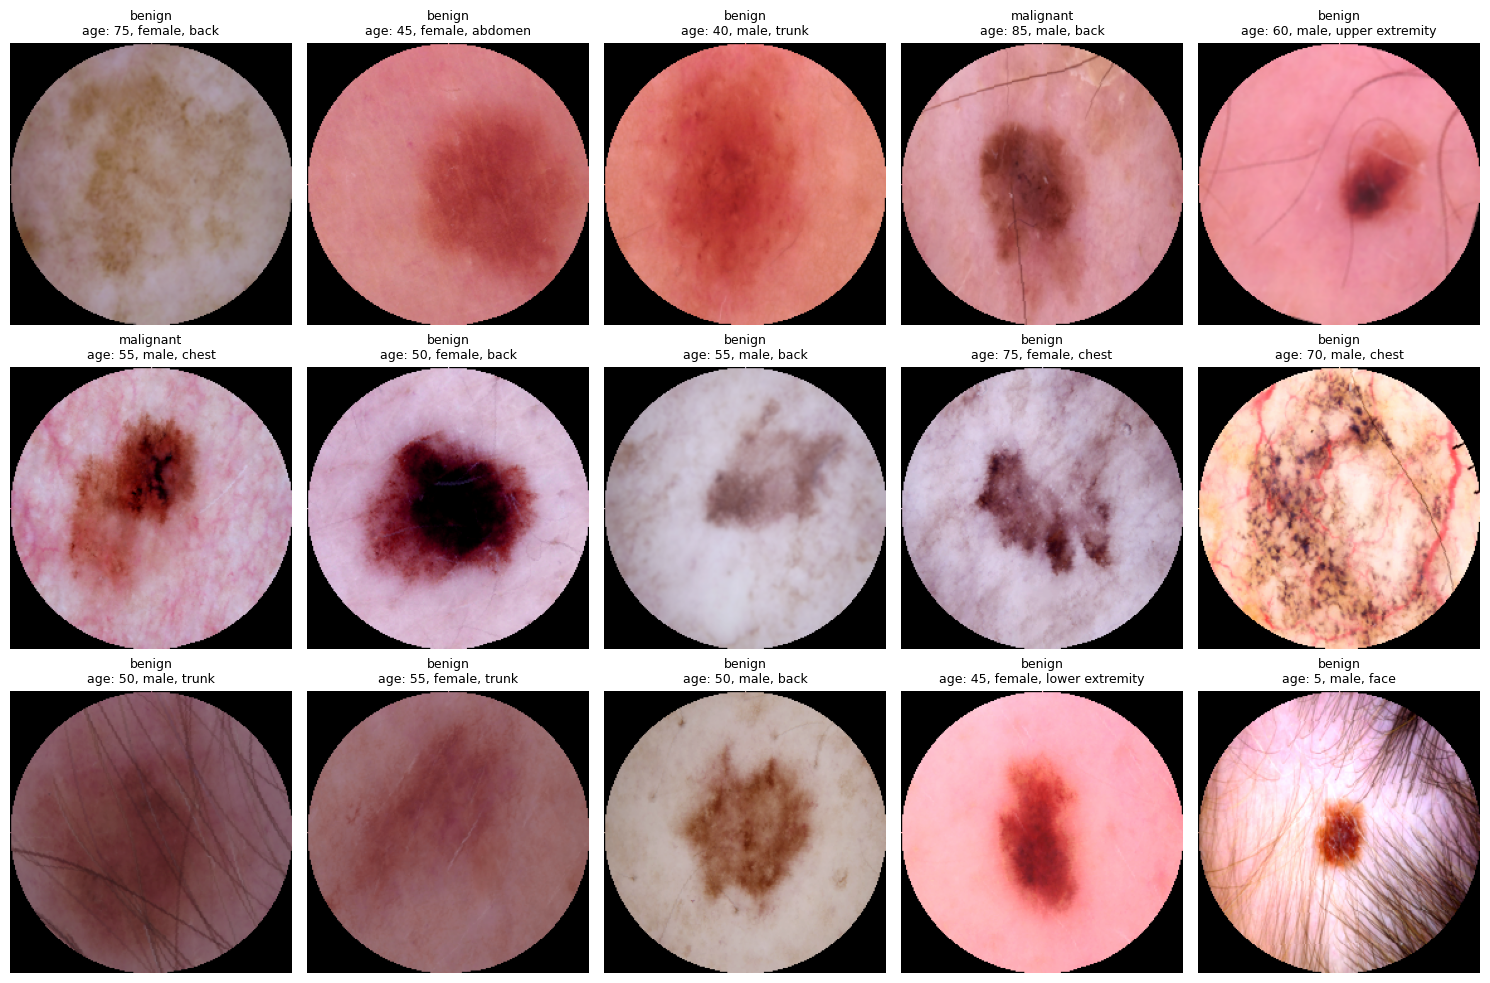

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images_with_metadata(loader, class_names, metadata_cols, scaler, num_images=15):
    plt.figure(figsize=(15, 10))
    k = 0

    age_idx = metadata_cols.index('age')
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    for images, metadata, labels in loader:
        image = images[0].cpu().numpy()
        label = labels[0].item()
        metadata_vec = metadata[0].cpu().numpy()
        # place the colour channel at the end, instead of at the beginning
        img = np.transpose(image, (1, 2, 0))
        img = img * std + mean
        img = np.clip(img, 0, 1)

        #Format metadata
        meta_display = []

        age_val = metadata_vec[age_idx]
        original_age = scaler.inverse_transform([[age_val]])[0][0]
        meta_display.append(f"age: {original_age:.0f}")


        for name, val in zip(metadata_cols, metadata_vec):
            if name != 'age' and val >= 0.5:
                meta_display.append(name.replace("sex_", "").replace("localization_", ""))

        title = f"{class_names[int(label)]}\n" + ", ".join(meta_display)

        plt.subplot(3, 5, k + 1)
        plt.imshow(img)
        plt.title(title, fontsize=9)
        plt.axis('off')
        print(f"Standardized age value: {age_val:.3f} -> Original age: {original_age:.1f}")


        k += 1
        if k >= num_images:
            break

    plt.tight_layout()
    plt.show()

show_sample_images_with_metadata(train_loader, class_names, final_metadata_cols, scaler)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def train_net(model, train_loader, val_loader,
              batch_size=BATCH_SIZE,
              learning_rate=LEARNING_RATE,
              num_epochs=NUM_EPOCHS):

    import time
    import torch.optim as optim
    from tqdm import tqdm
    from torch.optim.lr_scheduler import ReduceLROnPlateau  #new


    torch.manual_seed(RANDOM_SEED)
    device = DEVICE
    print("Using device:", device)
    model = model.to(device)

    # Binary classification loss
    pos_weight = compute_pos_weight(train_loader).to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay = 1e-5)

    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=0, verbose=True) #new

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    print("\nResNet50 loaded and training will begin now...")
    print("Samples in training set:", len(train_loader.sampler))
    print("Batches per epoch:", len(train_loader))

    start_time = time.time()
    for epoch in range(num_epochs):
        print(f"\nStarting epoch {epoch+1}/{num_epochs}")
        model.train()
        total_train_loss = 0.0
        total_correct = 0
        total_samples = 0

        for batch_idx, (images, metadata, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            images = images.to(device)
            metadata = metadata.to(device)
            orig_labels =labels.clone().to(device)
            labels = labels.float().to(device)  #convert to float for BCE
            labels = torch.clamp(labels, 0.02, 1.0-0.02)

            optimizer.zero_grad()

            outputs = model(images, metadata)



            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            predicted = (probs > 0.5).float()
            total_correct += (predicted == orig_labels).sum().item()
            total_samples += orig_labels.size(0)

        avg_train_loss = total_train_loss / total_samples
        train_accuracy = total_correct / total_samples
        train_err[epoch] = 1 - train_accuracy
        train_loss[epoch] = avg_train_loss

        val_err[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion, device)

        scheduler.step(val_loss[epoch])  #new
        print(f"Current learning rate: {optimizer.param_groups[0]['lr']:.6f}")  #new


        print("Epoch {}: Train err: {:.4f}, Train loss: {:.4f} | Val err: {:.4f}, Val loss: {:.4f}".format(
            epoch + 1, train_err[epoch], train_loss[epoch], val_err[epoch], val_loss[epoch]))

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print("\nFinished Training")
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    final_model_path = get_model_name(model.name, batch_size, learning_rate, num_epochs)
    np.savetxt(f"{final_model_path}_train_err.csv", train_err)
    np.savetxt(f"{final_model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{final_model_path}_val_err.csv", val_err)
    np.savetxt(f"{final_model_path}_val_loss.csv", val_loss)

    return final_model_path


In [ ]:
train_dataset=train_loader.dataset
val_data=val_loader.dataset
print('Num training images: ', len(train_loader.sampler))
print('Num validation images: ', len(val_loader.sampler))
print('Num test images: ', len(test_loader.sampler))

Num training images:  7010
Num validation images:  1502
Num test images:  1503


In [ ]:
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total:,}")
    print(f"Trainable parameters: {trainable:,}")
    return total, trainable


model = SkinLesionNet()
model.name = "resnet50_binary"

# Count and display parameter summary
count_parameters(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


Total parameters: 23,511,265
Trainable parameters: 23,285,921


(23511265, 23285921)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



ResNet50 loaded and training will begin now...
Samples in training set: 7010
Batches per epoch: 439

Starting epoch 1/10


Epoch 1/10: 100%|██████████| 439/439 [02:01<00:00,  3.61it/s]


Current learning rate: 0.000050
Epoch 1: Train err: 0.2612, Train loss: 0.8368 | Val err: 0.2903, Val loss: 0.7351

Starting epoch 2/10


Epoch 2/10: 100%|██████████| 439/439 [02:11<00:00,  3.34it/s]


Current learning rate: 0.000050
Epoch 2: Train err: 0.2136, Train loss: 0.7734 | Val err: 0.2084, Val loss: 0.6296

Starting epoch 3/10


Epoch 3/10: 100%|██████████| 439/439 [02:01<00:00,  3.62it/s]


Current learning rate: 0.000050
Epoch 3: Train err: 0.1943, Train loss: 0.7416 | Val err: 0.2057, Val loss: 0.6208

Starting epoch 4/10


Epoch 4/10: 100%|██████████| 439/439 [02:00<00:00,  3.65it/s]


Current learning rate: 0.000035
Epoch 4: Train err: 0.1856, Train loss: 0.7098 | Val err: 0.1778, Val loss: 0.6272

Starting epoch 5/10


Epoch 5/10: 100%|██████████| 439/439 [02:00<00:00,  3.65it/s]


Current learning rate: 0.000035
Epoch 5: Train err: 0.1576, Train loss: 0.6639 | Val err: 0.1971, Val loss: 0.5925

Starting epoch 6/10


Epoch 6/10: 100%|██████████| 439/439 [02:01<00:00,  3.61it/s]


Current learning rate: 0.000024
Epoch 6: Train err: 0.1482, Train loss: 0.6420 | Val err: 0.1877, Val loss: 0.6488

Starting epoch 7/10


Epoch 7/10: 100%|██████████| 439/439 [02:00<00:00,  3.63it/s]


Current learning rate: 0.000017
Epoch 7: Train err: 0.1330, Train loss: 0.6069 | Val err: 0.1298, Val loss: 0.5957

Starting epoch 8/10


Epoch 8/10: 100%|██████████| 439/439 [01:57<00:00,  3.73it/s]


Current learning rate: 0.000017
Epoch 8: Train err: 0.1157, Train loss: 0.5631 | Val err: 0.1545, Val loss: 0.5722

Starting epoch 9/10


Epoch 9/10: 100%|██████████| 439/439 [01:58<00:00,  3.71it/s]


Current learning rate: 0.000012
Epoch 9: Train err: 0.1017, Train loss: 0.5298 | Val err: 0.1478, Val loss: 0.5921

Starting epoch 10/10


Epoch 10/10: 100%|██████████| 439/439 [01:59<00:00,  3.68it/s]


Current learning rate: 0.000008
Epoch 10: Train err: 0.0882, Train loss: 0.4957 | Val err: 0.1358, Val loss: 0.6033

Finished Training
Total time elapsed: 1436.78 seconds


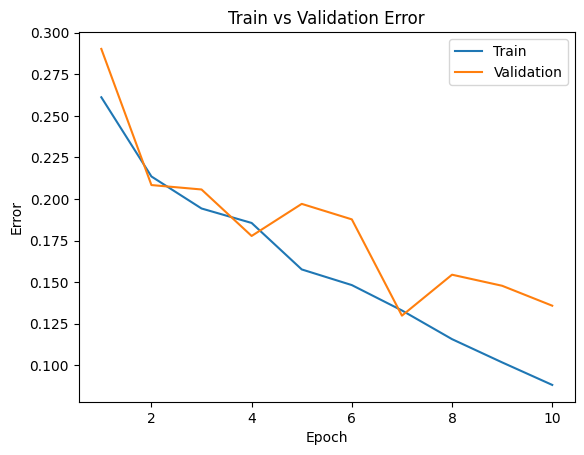

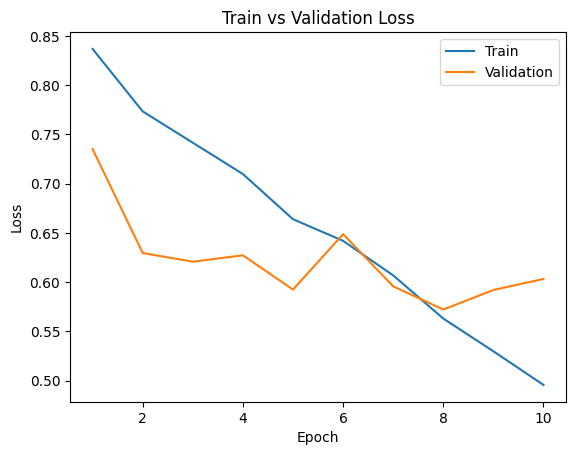

In [ ]:
model = SkinLesionNet(num_classes=NUM_CLASSES)
model.name = "resnet50_binary"

model_id = train_net(model, train_loader, val_loader, batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, num_epochs=NUM_EPOCHS
)

plot_training_curve(model_id)


In [ ]:
print("Expected metadata columns:")
print(final_metadata_cols)

missing_cols = [col for col in final_metadata_cols if col not in test_df_model.columns]
print("\nMissing columns in test_df_model:", missing_cols)

for col in missing_cols:
    print(f"Sample values in added column '{col}':", test_df_model[col].unique())

print("Scaler mean (should match training):", scaler.mean_)
print("Sample scaled ages from test_df_model:")
print(test_df_model['age'].head())


print("Final shape of metadata vector (per sample):", test_df_model[final_metadata_cols].shape[1])


sample_row = test_df_model.sample(1)
print(sample_row[final_metadata_cols + ['binary_label']])



Expected metadata columns:
['age', 'sex_female', 'sex_male', 'sex_unknown', 'localization_abdomen', 'localization_acral', 'localization_back', 'localization_chest', 'localization_ear', 'localization_face', 'localization_foot', 'localization_genital', 'localization_hand', 'localization_lower extremity', 'localization_neck', 'localization_scalp', 'localization_trunk', 'localization_unknown', 'localization_upper extremity']

Missing columns in test_df_model: []
Scaler mean (should match training): [51.86382808]
Sample scaled ages from test_df_model:
0    0.480878
1    1.662953
2   -1.292234
3    0.185359
4   -1.292234
Name: age, dtype: float64
Final shape of metadata vector (per sample): 19
          age  sex_female  sex_male  sex_unknown  localization_abdomen  \
678  1.071915        True     False        False                     0   

     localization_acral  localization_back  localization_chest  \
678                   0                  0                   0   

     localization_ear

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import numpy as np
import torch

def find_best_threshold(model, val_loader, target_recall = 0.8, min_accuracy=0.85): #iterates through thresholds to give informed estimatesd
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for images, metadata, labels in val_loader:
            images = images.to(device)
            metadata = metadata.to(device)
            labels = labels.float().to(device)

            outputs = model(images, metadata)
            probs = torch.sigmoid(outputs).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy().astype(int))

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    best_thresh = 0.5
    best_recall = -1
    for t in np.linspace(0.0, 1.0, 101):
        preds = (all_probs > t).astype(int)
        acc = accuracy_score(all_labels, preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, preds, average=None, labels=[0, 1], zero_division=0)
        malignant_recall = recall[1]  # index 1 = malignant

        # new: only update if recall is better abd accuracy is met
        if malignant_recall >= target_recall and acc >= min_accuracy:
            if malignant_recall > best_recall:
                best_recall = malignant_recall
                best_thresh = t

    print(f"Best threshold based on malignant recall (acc >= {min_accuracy}): {best_thresh:.2f} (Recall = {best_recall:.4f})")
    return best_thresh


def evaluate_on_test(model, test_loader, class_names, threshold):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, metadata, labels in test_loader:
            images = images.to(device)
            metadata = metadata.to(device)
            labels = labels.float().to(device)

            outputs = model(images, metadata)
            probs = torch.sigmoid(outputs)
            preds = (probs > threshold).long()  #binary orediction

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy().astype(int))

    print("Classification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=['benign', 'malignant']))

    acc = accuracy_score(all_labels, all_preds)
    print("Accuracy: {:.4f}".format(acc))

    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:\n", cm)

    return all_labels, all_preds

best_threshold = find_best_threshold(model, val_loader)

all_labels, all_preds = evaluate_on_test(model, test_loader, class_names=classes, threshold = best_threshold)

Best threshold based on malignant recall (acc >= 0.85): 0.34 (Recall = 0.8470)
Classification Report:

              precision    recall  f1-score   support

      benign       0.97      0.85      0.91      1220
   malignant       0.58      0.87      0.69       283

    accuracy                           0.86      1503
   macro avg       0.77      0.86      0.80      1503
weighted avg       0.89      0.86      0.87      1503

Accuracy: 0.8556

Confusion Matrix:
 [[1040  180]
 [  37  246]]


In [ ]:
all_labels_final, all_preds_final = evaluate_on_test(
    model,
    final_test_loader,
    class_names=classes,
    threshold=best_threshold
)

Classification Report:

              precision    recall  f1-score   support

      benign       0.48      0.61      0.54      1001
   malignant       0.79      0.69      0.73      2100

    accuracy                           0.66      3101
   macro avg       0.64      0.65      0.64      3101
weighted avg       0.69      0.66      0.67      3101

Accuracy: 0.6630

Confusion Matrix:
 [[ 615  386]
 [ 659 1441]]


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def visualize_test_predictions(model, test_loader, class_names, threshold=best_threshold, num_images=16):
    model.eval()
    device = next(model.parameters()).device
    images_shown = 0

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    axs = axs.flatten()

    with torch.no_grad():
        for images, metadata, labels in test_loader:
            images = images.to(device)
            metadata = metadata.to(device)
            labels = labels.to(device).float()

            outputs = model(images, metadata)
            probs = torch.sigmoid(outputs)
            preds = (probs > threshold).long()

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break

                img = images[i].cpu().numpy()
                img = np.transpose(img, (1, 2, 0))
                img = img * std + mean
                img = np.clip(img, 0, 1)

                true_label = int(labels[i].item())
                pred_label = int(preds[i].item())
                prob = float(probs[i].item())

                correct = (true_label == pred_label)

                ax = axs[images_shown]
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(
                    f"Pred: {class_names[pred_label]} ({prob:.2f})\nTrue: {class_names[true_label]}",
                    fontsize=10
                )

                if not correct:
                  ax.imshow(np.full_like(img, fill_value=[1.0, 0, 0], dtype=np.float32), alpha=0.3)
                  ax.text(5, 20, "Incorrect", color='white', fontsize=12, weight='bold',
                          bbox=dict(facecolor='red', edgecolor='none', boxstyle='round,pad=0.2'))


                images_shown += 1


            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()


#code for this section was loosely inspired by the following resources:
# https://docs.pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
# https://stackoverflow.com/questions/64392631/how-can-i-visualize-all-the-predictions-with-tensorboard-in-pytorch?

In [ ]:

class_names = ['benign', 'malignant']

visualize_test_predictions(model, test_loader, class_names, best_threshold)